In [ ]:
# enter CID
CID = '08020121'


b = []
for i in range(0,8):
    b += [int(CID[i])]
print('CID')
print(b)

In [5]:
import numpy as np
import matplotlib.pyplot as pl
import math as mt

In [6]:
# Simpson
def Simpson(h,yn):
    # number of nodal pointa
    N = len(yn)
    # initialise sum
    S = 0
    # loop every two points, and use the three points for Simpson rule
    # current point yn[i] and successive two points yn[i+1], yn[i+2]
    for i in range(0,N-2,2):
        S += h/3 * ( yn[i] + 4*yn[i+1] + yn[i+2] )
    return S

In [8]:
# Task A

# set the step intervals in x and y
dx = 0.05
dy = 0.04

# set the x range, not including the boundaries
x = np.arange(0,np.pi+dx,dx)
N = len(x)
# the y range depends of the various values of x, and cannot be fixed here

# integrate in dy, for all the value of x, i.e. find G(x)

G = np.zeros(N)
# for every x
for i in range(0,N):
    # determine the upper boundary for this x
    px = -x[i]+np.pi
    # set the y points for this x
    y = np.arange(0,px+dy,dy)
    z = np.zeros(len(y))
    # determine the values of the function z(x,y)
    for j in range(0,len(y)):
        z[j]=np.sin(x[i]*y[j])*np.cos(x[i]+y[j])
    
    # integrate in dy from 0 to px (for this specific x)
    G[i] = Simpson(dy,z) # G(x)

# integrate G(x) in dx
I =  Simpson(dx,G)

print(I)



-1.8699704195284717


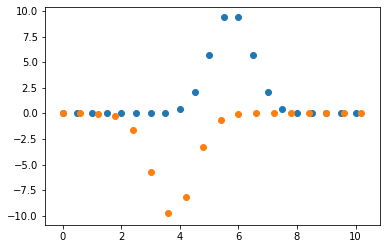

In [2]:
# preliminary work out for Task B to generate data sets
dx1 = 0.5
xn1 = np.arange(0,10+dx1,dx1)
dx2 = 0.6
xn2 = np.arange(0,10+dx2,dx2)

yn1 = 5*abs(np.sin(2*xn1*np.pi/5))
yn1 = 10*np.exp(-(xn1-5.75)**2)
yn2 = -10*np.exp(-(xn2-3.75)**2)

pl.scatter(xn1,yn1)
pl.scatter(xn2,yn2)

f = open('Sety1.txt','w')
for i in yn1:
    f.write(str(int(i))+'\n')
f.close()
f = open('Sety2.txt','w')
for i in yn2:
    f.write(str(int(i))+'\n')
f.close()

In [3]:
# Langrangian polynomial
# compute the Lagrangian polynomials j, given nodes xn at a given point xp
def Lagrangian(j,xn,xp):
    # establish the number of nodes
    n = len(xn)
    # the order of the polynomial will then be n-1
    
    # set the initial value of the polynomial to 1
    L = 1
    # range of k is from 0 to n-1 (the order of the polynomial)
    for k in range(0,n):
        # exclude the case k == j
        if k != j:
            L *= (xp-xn[k]) / (xn[j]-xn[k])
    return L

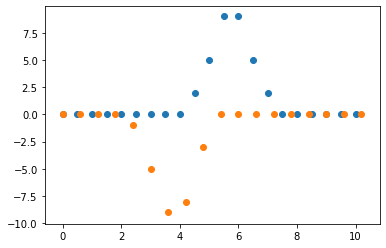

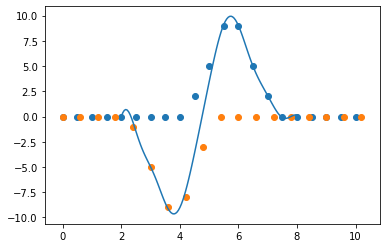

In [4]:
# Task B
dx1 = 0.5
xn1 = np.arange(0,10+dx1,dx1)
dx2 = 0.6
xn2 = np.arange(0,10+dx2,dx2)

N1 = len(xn1)
N2 = len(xn2)

yn1 = np.ndarray(N1)
f = open('Sety1.txt','r')
temp = f.readlines()
f.close
for i in range(0,N1):
    yn1[i] = float(temp[i].rstrip())
    
yn2 = np.ndarray(N2)
f = open('Sety2.txt','r')
temp = f.readlines()
f.close
for i in range(0,N2):
    yn2[i] = float(temp[i].rstrip())
    
pl.scatter(xn1,yn1)
pl.scatter(xn2,yn2) 
pl.show()

# domain of interpolation
dx = 0.05
x = np.arange(2,8+dx,dx)
y = []

# interpolate for all the values of x in the interpolating range
for xp in x:
    # evaluate pn(xp)
    yp = 0
    # use Langrangian polynomials up to order n, included
    for j in range(0,N1):
        # compute Lagrangian polynomial of order n
        Lj1 = Lagrangian(j,xn1,xp)
        yp += yn1[j] * Lj1
    for j in range(0,N2):
        # compute Lagrangian polynomial of order n
        Lj2 = Lagrangian(j,xn2,xp)
        yp += yn2[j] * Lj2
    # add the current value of yp to the list of y
    y += [yp]

y = np.array(y)
pl.scatter(xn1,yn1)
pl.scatter(xn2,yn2)
pl.plot(x,y)
pl.show()


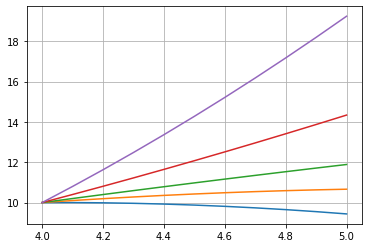

In [14]:
# Task C
def func1(x,y):
    f = y[1]
    return f
def func2(x,y):
    f = 2*y[1]/x - 2*y[0]/x**2
    return f

# System of two ODEs with Forward Euler
def FwEulerTwo(Y0,t0,tend,h):
    # compose nodal times
    t = np.arange(t0,tend+h,h)
    # determine the number of time steps
    N = len(t)
    # allocate output array
    Y = np.ndarray((2,N))
    # initialise the solution
    t[0] = t0
    Y[0,0] = Y0[0]
    Y[1,0] = Y0[1]
    # compute the solution incrementally at subsequent time steps
    for n in range(1,N):   
        Y[0,n] = Y[0,n-1] + func1(t[n-1],Y[:,n-1]) * h
        Y[1,n] = Y[1,n-1] + func2(t[n-1],Y[:,n-1]) * h
    return (t,Y)


# split the eqn in two sets of first oder eqn
#dy/dx = w
#dw/dx = dy^2/dx^2 = -5x*dy/dx-(x+7)*sin(x)
# let Y[0] be y and Y[1] be w i.e Y[1]=dy/dx:
#dY[0]/dx = Y[1]
#dY[1]/dx = -5*x*Y[1]-(x+7*sin(x))

# set the initial conditions
Y0 = np.ndarray(2)

Y0[0] = 10  # initial y

for a in [0,1,2,4,8]:
    Y0[1] = a  # initial dy/dx
    (x,Y) = FwEulerTwo(Y0,4,20,0.1)
    y = Y[0,:]

    pl.plot(x,y)
    pl.grid()
    
pl.show()


In [9]:
def func(x):
    y = x-4-mt.sqrt(16-(x-4)**2)
    return y

In [10]:
def mybisection(a,b,eps):
    # repeat the split of teh interval until the bracketing intervla becomes smaller than the accuracy
    while abs(a-b)>eps:
        # calculate the mid point
        xm = (a + b) / 2
        # establish in which subinterval the solution lies
        # compute f(a) * f(xm)
        ff = func(a) * func(xm)
        if ff < 0: 
            # the solution lies in the left interval
            # set the upper bracket as xm
            b = xm
        else:
            # the solution lies in the right interval
            # set the lower bracket as xm
            a = xm
            
    # the true solution is bracketed within the latest interval [a,b]
    # we can approximate it with the midpoint
    sol = (a + b) / 2
    
    return sol

6.82861328125 2.82861328125


/Users/ncinosi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


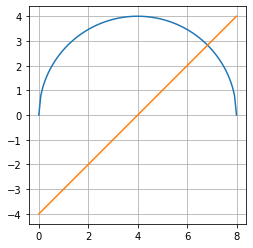

In [12]:
x = np.linspace(0,8,100)
y1 = np.sqrt(16-(x-4)**2)
pl.plot(x,y1)
y2 = x-4
pl.plot(x,y2)
pl.grid()
pl.axes().set_aspect('equal')


sol = mybisection(0,8,0.001)
print(sol,(sol-4))